# Assignment 2 - Question 1
The objective of this assignment is to get you familiarize with  the  problem  of  `Clustering`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q1.ipynb`.

In [ ]:
import nltk
nltk.download('punkt')    
# if u r facing issues while importing nltk, please uncomment above line and run
import re
import numpy as np
import sklearn
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import tensorflow as tf
import os

# # Note that the `tpu` argument is for Colab-only
# resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

# tf.config.experimental_connect_to_cluster(resolver)
# tf.tpu.experimental.initialize_tpu_system(resolver)
# strategy = tf.distribute.TPUStrategy(resolver)


In [ ]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer


# Dataset



*   Try to explore the dataset and first understand
*   Steps while processing the dataset:

1.   Load the dataset
>> The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: train and test. Here, we only use train part of the dataset as we don't need any training.

2.   pre-processing of the dataset
>>   A set of basic pre-processing steps are given below, if you can do it better, it is appreciable
3.   Trying to obtain the embeddings for the text. 
>> Here, we used bert model to obtain the embeddings, if you want to use anyother sentence/word embeddings (ELMo,universal sentence encoder, or other bert models) you can use it, but not mandatorily change it)

PS: You need not completely understand how bert works. If you are interested, few links will be mentioned below.

In [ ]:
# loading of dataset

from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

# print(list(newsgroups_train))
#['data', 'filenames', 'target_names', 'target', 'DESCR']
# all we require for our task is data and target. 
#target_names describe the different groups present (which are 20) all over the dataset

# print(list(newsgroups_train.target_names))

In [ ]:
# with strategy.scope():
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [ ]:
#preprocessing of sentences and the article

def remove_punct(text):
  text = re.sub('[^a-zA-Z0-9 ]+','', text)
  return text

def remove_urls(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)

def remove_tag(text):   
  text=' '.join(text)
  html_pattern = re.compile('<.*?>')
  return html_pattern.sub(r'', text)

def pre_process_sentence(sentence):
  sentence = sentence.lower()
  sentence = remove_punct(remove_urls(sentence))
  return sentence

def pre_process_article(article):
  article = str(article).replace("\n", '')
  article = sent_tokenize(article)
  sentences = []
  for each in article:
    if len(each.split(":")) > 1:
      continue
    sentences.append(pre_process_sentence(each))
  return sentences



In [ ]:

def get_review_embedding(article):
  sentences = pre_process_article(article)

  #here review(input) has to be a list of sentences
  #use suitable embeddings to get an embedding for the whole review
  #usage of sentence embeddings is recommended

  sentence_embeddings = bert_model.encode(sentences)

  # take average of all sentence embeddings to obtain a review embedding 
  review_embedding = np.zeros(768)
  for each in sentence_embeddings:
    review_embedding = np.add(np.array(each), review_embedding)

  return review_embedding




In [ ]:
X=[]

for article in newsgroups_train.data:
  # print(article)
  X.append(get_review_embedding(article))

In [ ]:
X = np.array(X)

In [ ]:
X.shape

(11314, 768)

In [ ]:
# import pickle
# with open('file.pkl','wb') as file:
#   pickle.dump(X,file)

In [ ]:
# import pickle
# with open('file.pkl','rb') as file:
#   X=pickle.load(file)

In [ ]:
X.shape

(11314, 768)

In [ ]:
# data visualization 

# Try to visualise the points from all the domains and try to visualise them 
# hint: you can use PCA 

import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt




In [ ]:
pca = PCA(n_components = 6)
pca.fit(X)
x_pca = pca.transform(X)

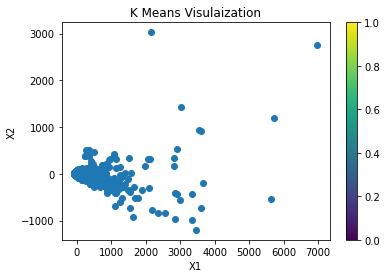

In [ ]:
x = x_pca[:, 0]
y = x_pca[:, 1]


scatter = plt.scatter(x,y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar(scatter)
plt.title("K Means Visulaization")
plt.show()

# K_Means Algorithm


In [ ]:
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_values = [2,3,4,5,6,7,8,9]
inertia = list()
clusters = dict()
silhouette_avg = list()
for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=4).fit(x_pca)
  inertia.append(kmeans.inertia_)
  cls = kmeans.predict(x_pca)
  silhouette_avg.append(silhouette_score(x_pca, cls))
  clusters[k]=kmeans.labels_


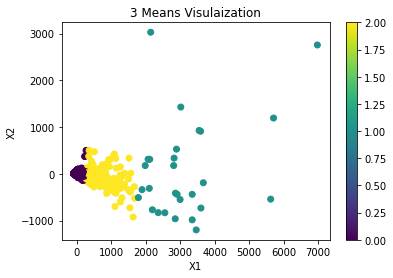

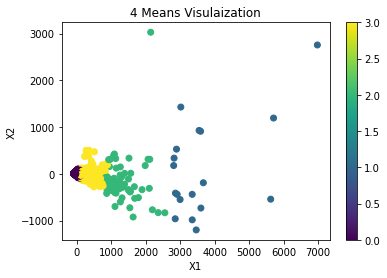

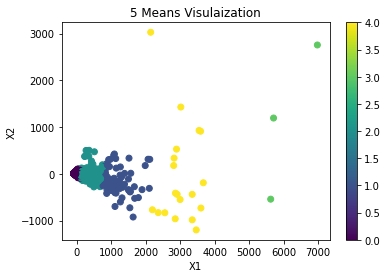

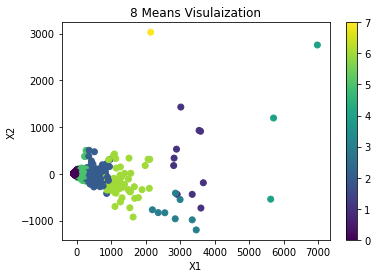

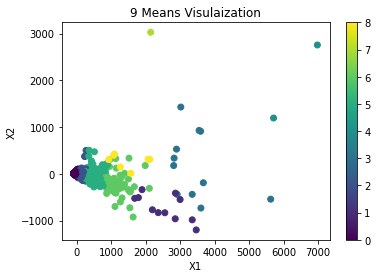

In [ ]:
#code for visualisation of clusters

for k in k_values:
  x = x_pca[:, 0]
  y = x_pca[:, 1]
  cluster = np.array(clusters[k])
  scatter = plt.scatter(x,y,c=cluster)
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.colorbar(scatter)
  plt.title(str(k) +" Means Visulaization")
  plt.show()



# Elbow method



*   Try to understand how elbow method works
*   Plot the graph between average distance and the number of clusters
*   Use elbow method to find the optimal number of clusters, 







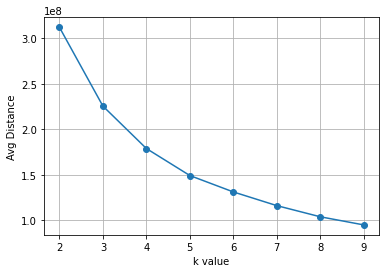

In [ ]:
def elbow_method():
  plt.plot(k_values,inertia, marker = 'o')
  plt.xlabel('k value')
  plt.ylabel('Avg Distance')
  plt.grid()
  plt.show()

elbow_method()

To determine the optimal number of clusters, we have to select the value of k at the “elbow”. Elbow means the point after which inertia starts decreasing in linear fasion. Therfore according to elbow method k should be equal to 5. 

# Silhouette Method


*   Compute silhouette score varying the K number of clusters

*   Plot the graph between silhoutte score and number of clusters 

*   Find the optimal number of clusters using silhouette method




> Report the optimal number of clusters you obtained from above two methods (elbow and silhouette)




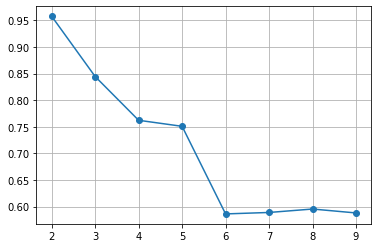

In [ ]:
def silhouette_score():
  plt.plot(k_values,silhouette_avg , marker='o')
  plt.grid()
  plt.show()

silhouette_score()

The no of clusters here is deduced by the finding the max value of silhouette score.<br>
Therefore appropriate number of clusters according to silhouette score (w.r.t euclidean) is 2.

# Agglomerative clustering

In [ ]:
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 

from sklearn.cluster import AgglomerativeClustering

def AgglomerativeCluster():
  clustering = AgglomerativeClustering().fit(X)
  return clustering.labels_


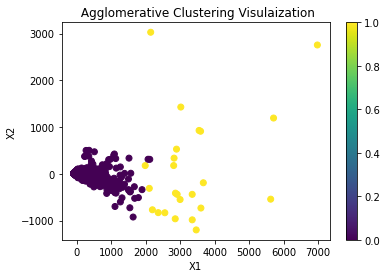

In [ ]:
#code for visualisation of clusters
cluster = np.array(AgglomerativeCluster())
x = x_pca[:, 0]
y = x_pca[:, 1]
scatter = plt.scatter(x,y,c=cluster)
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar(scatter)
plt.title(" Agglomerative Clustering Visulaization")
plt.show()


# Dendogram


*   Try to understand the difference between agglomerative clustering and hierarchical clustering
*   Plot dendograms for both kinds of clustering
*   Find the optimal number of clusters with the help of Dendogram



When compared to agglomerative clustering, divisive clustering is more complicated since we require a flat clustering algorithm as a "subroutine" to split each cluster until each data has its own singleton cluster.
If we don't create a complete hierarchy all the way down to individual data leaves, divisive clustering is more efficient. Because we exhaustively search the N x N matrix dist mat for the lowest distance in each of N-1 repetitions, the time complexity of a naive agglomerative clustering is O(n^3). We can decrease this complexity to O(n2logn) by using a priority queue data structure . It can be reduced to O with a few further tweaks (n2).<br>
Without first examining the global distribution of data, agglomerative clustering makes judgments based on local patterns or neighboring points. When it comes to top-level partitioning decisions, divisive clustering considers the global distribution of data.

In [ ]:
# code to write dendogram
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
  
clustering = AgglomerativeClustering(distance_threshold=0,n_clusters = None).fit(X)
plot_dendrogram(clustering, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()





Optimal number of clusters are found using dendogram. Following Steps are used:<br>
1. Horizontal lines are extended to y axis.
2. Then we see which consequtive lines have max distance.
3. The line is drawn between the consequtive lines which has max gap.
That line will cut dendogram. The no. of points where this horizontal lines cuts the dendogram is the answer. Inabove case it should be 2.

# useful links to understand BERT

*  https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270#:~:text=How%20BERT%20works,%2Dwords)%20in%20a%20text.&text=As%20opposed%20to%20directional%20models,sequence%20of%20words%20at%20once.


